In [30]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

from konlpy.tag import Okt
import re

from apyori import apriori


from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

In [5]:
df_3_not_re = pd.read_csv('df_3_not_re.csv')

In [6]:
df_3_not_re = df_3_not_re.drop('Unnamed: 0', axis = 1)

In [7]:
df_3_not_re.head()

,index,username,date_t,text_t,favorites,hashtags,retweets,replies,author_id,p_link,dt_date,dt_date_year,dt_date_month,dt_date_day,dt_date_min,dt_date_sec
0,12,Onlyyou1230bts,2020-12-03 23:59:54,@IMBANGBAKSA #석진생일ㅊㅋ\n#HAPPYJINDAY\n#석진아_아미가_생...,1,NaN,0,NaN,1190676407438868487,NaN,2020-12-03 23:59:54,2020,12,3,59,54
1,14,miaydizz,2020-12-03 23:59:53,@yoonmeowbit @BTS_twt THANK YOU SEOKJIN 🥺 @BTS...,0,NaN,0,NaN,1135779783822913537,NaN,2020-12-03 23:59:53,2020,12,3,59,53
2,18,yl58126824,2020-12-03 23:59:52,우와아....👀\n\n#BTS_BE #LifeGoesOn\n#방탄소년단 #BTS @...,3,NaN,3,NaN,960744597314875393,NaN,2020-12-03 23:59:52,2020,12,3,59,52
3,30,_Dooooo0,2020-12-03 23:59:47,아근데 너무 귀엽지 않니 방탄소년단 부모님 모임ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ https:/...,1,NaN,0,NaN,1219656208384057344,NaN,2020-12-03 23:59:47,2020,12,3,59,47
4,37,Jjiminyyoongii,2020-12-03 23:59:45,Happy Birthday Kim Seokjin 🌙\n\n#LePetitPrince...,2,NaN,0,NaN,1082022749722177537,NaN,2020-12-03 23:59:45,2020,12,3,59,45


In [8]:
# Basic Cleaning Text Function
def CleanText(readData, Num=False, Eng=False):

    # Remove Retweets 
    text = re.sub('RT @[\w_]+: ', '', readData)

    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)

    # Remove or Replace URL 
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    
    # Remove Hashtag
    text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)

    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    
    # Remove newline
    text = text.replace('\n',' ')
    
    # Remove 방탄, 방탄소년단
    text = text.replace('방탄',' ')
    text = text.replace('방탄소년단',' ')
    text = text.replace('소년단',' ')
       
    
    
    
    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+',' ',text)
    
    if Eng is True:
        # Remove English 
        text = re.sub('[a-zA-Z]' , ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())
       
    return text

In [9]:
df_tweet = []

In [12]:
for i in range(len(df_3_not_re)):
    
    #CleanText(df_3['text_t'][i])
    
    df_tweet.append(CleanText(df_3_not_re['text_t'][i], Num = True))

In [13]:
okt = Okt()

In [14]:
dataset = []

In [15]:
for i in range(len(df_tweet)):
    
    #dataset.append(hannanum.nouns(re.sub('[^0-9가-힣a-zA-Z\s]','',df_tweet[i])))
    #print(i)
    re_k = okt.nouns(re.sub('[^0-9가-힣\s]','',df_tweet[i]))
    
    re_k_temp =[]
    
    for n in re_k:        
        
        if len(n) > 1:
            
            re_k_temp.append(n)
            
    
    
    dataset.append(re_k_temp)

In [17]:
result = (list(apriori(dataset, min_support=0.01)))

In [18]:
df_1 = pd.DataFrame(result)

In [19]:
df_1['length'] = df_1['items'].apply(lambda x: len(x))

In [20]:
df_1 = df_1[(df_1['length']==2)&(df_1['support']>0.01)].sort_values(by='support',
                                                                  ascending = False)

In [21]:
df_1.head()

,items,support,ordered_statistics,length
79,"(축하, 생일)",0.137398,"[((), (축하, 생일), 0.13739793140990747, 1.0), ((생...",2
78,"(생일, 진아)",0.088260,"[((), (생일, 진아), 0.0882598439484667, 1.0), ((생일...",2
101,"(축하, 진아)",0.086445,"[((), (축하, 진아), 0.0864452912357104, 1.0), ((진아...",2
63,"(사랑, 생일)",0.056360,"[((), (사랑, 생일), 0.05636000725821085, 1.0), ((사...",2
69,"(사랑, 축하)",0.054037,"[((), (사랑, 축하), 0.05403737978588278, 1.0), ((사...",2


In [22]:
G = nx.Graph()

In [23]:
ar=(df_1['items'])
G.add_edges_from(ar)

In [26]:
pr= nx.pagerank(G)
nsize = np.array([v for v in pr.values()])

In [27]:
nsize = 1000* (nsize - min(nsize))/ (max(nsize)-min(nsize))

In [28]:
pos = nx.fruchterman_reingold_layout(G)

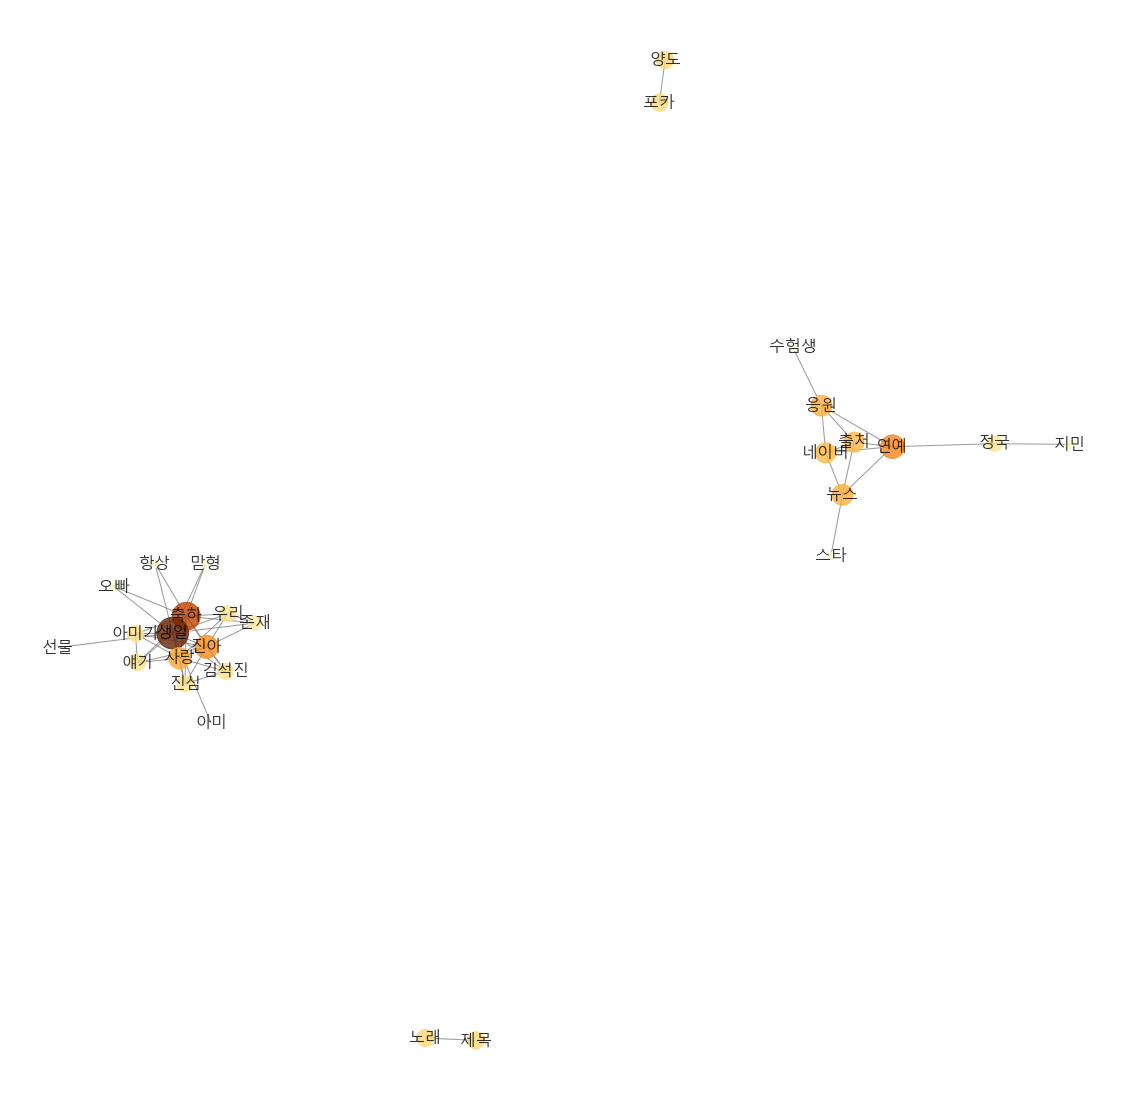

In [32]:
plt.figure(figsize = (20,20))
plt.axis('off')
nx.draw_networkx(G, font_family=font_name, font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha = 0.8, edge_color='.5', cmap = plt.cm.YlOrBr)

plt.show()